In [8]:
import ast
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm
from os.path import join
from functions import drawSAandBB

In [9]:
DATASET_DIRECTORY = 'symmetry_database'

In [10]:
df = pd.read_csv(join(DATASET_DIRECTORY,'labels.csv'),index_col='index')

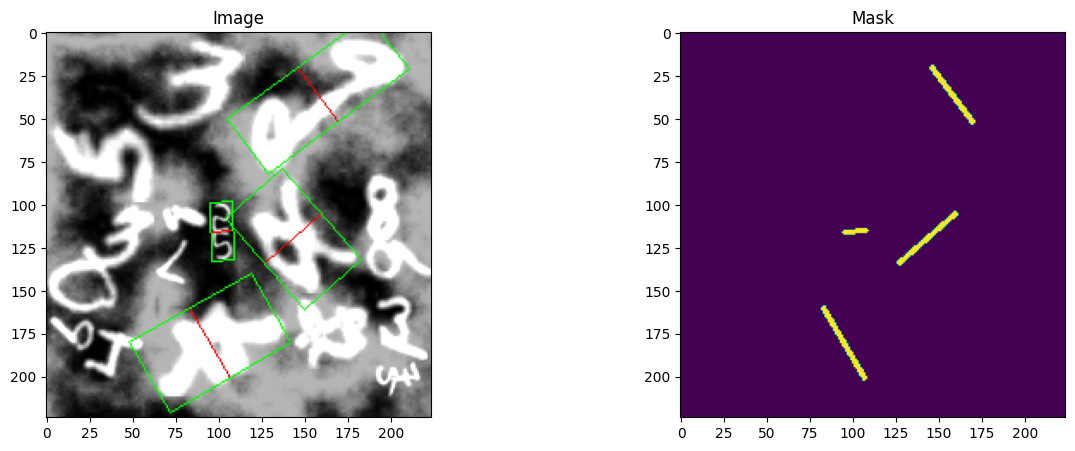

In [11]:
# Draws all symmetries in the row on the img
def drawRow(img, row):
    # Transforming list of dictionaries drom str to list
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        drawSAandBB(img, symm['startAxis'], symm['endAxis'], symm['center'], symm['width'], symm['height'], symm['finalRotation'])
    return img

# Returns a mask of the selected row
def getMask(row, path, thickness = 2):
    img = cv2.imread(join(path, row['fileName']))
    mask = np.zeros((img.shape[:2]), np.uint8)
    # Painting axis on mask
    symmetries = ast.literal_eval(row['symmetries'])
    # Looping through all symmetries in the image
    for symm in symmetries:
        cv2.line(mask, (int(symm['startAxisX']),int(symm['startAxisY'])), (int(symm['endAxisX']),int(symm['endAxisY'])), 255, thickness)
    return mask

row = df.iloc[9]
img = cv2.imread(join('symmetry_database', 'images', row['fileName']))
drawRow(img, row)
mask = getMask(row, join(DATASET_DIRECTORY, 'images'))

# Display
_, ax = plt.subplots(1,2,figsize=(15, 5))
ax[0].imshow(img), ax[0].set_title(f'Image')
ax[1].imshow(mask), ax[1].set_title(f'Mask')
plt.show()
        


In [12]:
for _,row in tqdm(df.iterrows(), total=len(df)):
    mask = getMask(row, join(DATASET_DIRECTORY, 'images'))
    cv2.imwrite(join(DATASET_DIRECTORY,'labels',f'mask_{row["fileName"]}'), mask)

100%|██████████| 574/574 [00:04<00:00, 130.13it/s]
